In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

sns.set_theme(style="darkgrid")
current_palette=sns.color_palette()

In [2]:
pd.options.display.min_rows = 20
pd.options.display.max_columns = 50

### Load in the data

In [3]:
## Read in 2022 data from filesystem
df_flights = pd.read_csv("../../data/eda/flights/flight_data_Y2022/flight_data_2022.csv.zip",  low_memory=False)

In [4]:
airlines = pd.read_csv("../../data/databases/flight_attributes/airlines.csv.zip", low_memory=False)
airline_mapper = airlines.set_index("Code")["Description"]

### Clean the data

In [5]:
SELECTED_COLUMNS = [
    'FlightDate',
    'Operating_Airline ',
    'OriginAirportID',
    'Origin',
    'OriginCityName',
    'OriginState',
    'DestAirportID',
    'Dest',
    'DestCityName',
    'DestState',
    'DestStateName',
    'CRSDepTime',
    'DepTime',
    'DepDelay',
    'DepDelayMinutes',
    'DepDel15',
    'DepartureDelayGroups',
    'DepTimeBlk',
    'TaxiOut',
    'WheelsOff',
    'WheelsOn',
    'TaxiIn',
    'CRSArrTime',
    'ArrTime',
    'ArrDelay',
    'ArrDelayMinutes',
    'ArrDel15',
    'ArrivalDelayGroups',
    'ArrTimeBlk',
    'Cancelled',
    'CancellationCode',
    'Diverted',
    'CRSElapsedTime',
    'ActualElapsedTime',
    'AirTime',
    'Flights',
    'Distance',
    'DistanceGroup',
    'CarrierDelay',
    'WeatherDelay',
    'NASDelay',
    'SecurityDelay',
    'LateAircraftDelay',
    'FirstDepTime',
    'TotalAddGTime',
    'LongestAddGTime'
]

In [6]:
def airline_mapping(df_flights):
    df_flights["Operating_Airline"] = df_flights["Operating_Airline"].map(airline_mapper)
    return df_flights

def tweak_df_flights(df_flights):
    df_flights = (
        df_flights[SELECTED_COLUMNS]
        .copy()
        .rename(columns={"Operating_Airline ": "Operating_Airline"})
    )
    df_flights.pipe(airline_mapping)
    return df_flights.assign(
        DepTime=df_flights.DepTime.fillna(0).astype("float16"),
        DepDelay=df_flights.DepDelay.fillna(0).astype("float16"),
        DepDelayMinutes=df_flights.DepDelayMinutes.fillna(0).astype("float16"),
        DepDel15=df_flights.DepDel15.fillna(0).astype("float16"),
        DepartureDelayGroups=df_flights.DepartureDelayGroups.fillna(0).astype("float16"),
        TaxiOut=df_flights.TaxiOut.fillna(0).astype("float16"),
        WheelsOff=df_flights.WheelsOff.fillna(0).astype("float16"),
        WheelsOn=df_flights.WheelsOn.fillna(0).astype("float16"),
        TaxiIn=df_flights.TaxiIn.fillna(0).astype("float16"),
        ArrTime=df_flights.ArrTime.fillna(0).astype("float16"),
        ArrDelay=df_flights.ArrDelay.fillna(0).astype("float16"),
        ArrDelayMinutes=df_flights.ArrDelayMinutes.fillna(0).astype("float16"),
        ArrDel15=df_flights.ArrDel15.fillna(0).astype("float16"),
        ArrivalDelayGroups=df_flights.ArrivalDelayGroups.fillna(0).astype("float16"),
        CRSElapsedTime=df_flights.CRSElapsedTime.fillna(0).astype("float16"),
        ActualElapsedTime=df_flights.ActualElapsedTime.fillna(0).astype("float16"),
        AirTime=df_flights.AirTime.fillna(0).astype("float16"),
        Flights=df_flights.Flights.fillna(0).astype("float16"),
        Distance=df_flights.Distance.fillna(0).astype("float16"),
        CarrierDelay=df_flights.CarrierDelay.fillna(0).astype("float16"),
        WeatherDelay=df_flights.WeatherDelay.fillna(0).astype("float16"),
        NASDelay=df_flights.NASDelay.fillna(0).astype("float16"),
        SecurityDelay=df_flights.SecurityDelay.fillna(0).astype("float16"),
        LateAircraftDelay=df_flights.LateAircraftDelay.fillna(0).astype("float16"),
        FirstDepTime=df_flights.FirstDepTime.fillna(0).astype("float16"),
        TotalAddGTime=df_flights.TotalAddGTime.fillna(0).astype("float16"),
        LongestAddGTime=df_flights.LongestAddGTime.fillna(0).astype("float16"),
        CancellationCode=df_flights.CancellationCode.fillna("none").astype("category"),
        FlightDate=pd.to_datetime(df_flights.FlightDate),
    ).astype(
        {
            "Operating_Airline": "category",
            "Origin": "category",
            "Dest": "category",
            "DestState": "category",
            "OriginState": "category",
            "OriginCityName": "category",
            "DestStateName": "category",
            "DestCityName": "category",
            "DepTimeBlk": "category",
            "ArrTimeBlk": "category",
            "Cancelled": "bool",
            "Diverted": "bool",
            "OriginAirportID": "int16",
            "DestAirportID": "int16",
            "CRSDepTime": "int16",
            "CRSArrTime": "int16",
            "DistanceGroup": "int16",
        }
    )


df_flights = tweak_df_flights(df_flights)
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 46 columns):
 #   Column                Dtype         
---  ------                -----         
 0   FlightDate            datetime64[ns]
 1   Operating_Airline     category      
 2   OriginAirportID       int16         
 3   Origin                category      
 4   OriginCityName        category      
 5   OriginState           category      
 6   DestAirportID         int16         
 7   Dest                  category      
 8   DestCityName          category      
 9   DestState             category      
 10  DestStateName         category      
 11  CRSDepTime            int16         
 12  DepTime               float16       
 13  DepDelay              float16       
 14  DepDelayMinutes       float16       
 15  DepDel15              float16       
 16  DepartureDelayGroups  float16       
 17  DepTimeBlk            category      
 18  TaxiOut               float16       
 19  

In [7]:
df_flights.shape

(4691967, 46)

## Flight Delays & Cancellations

#### Delays by Airline in 2022

<AxesSubplot: >

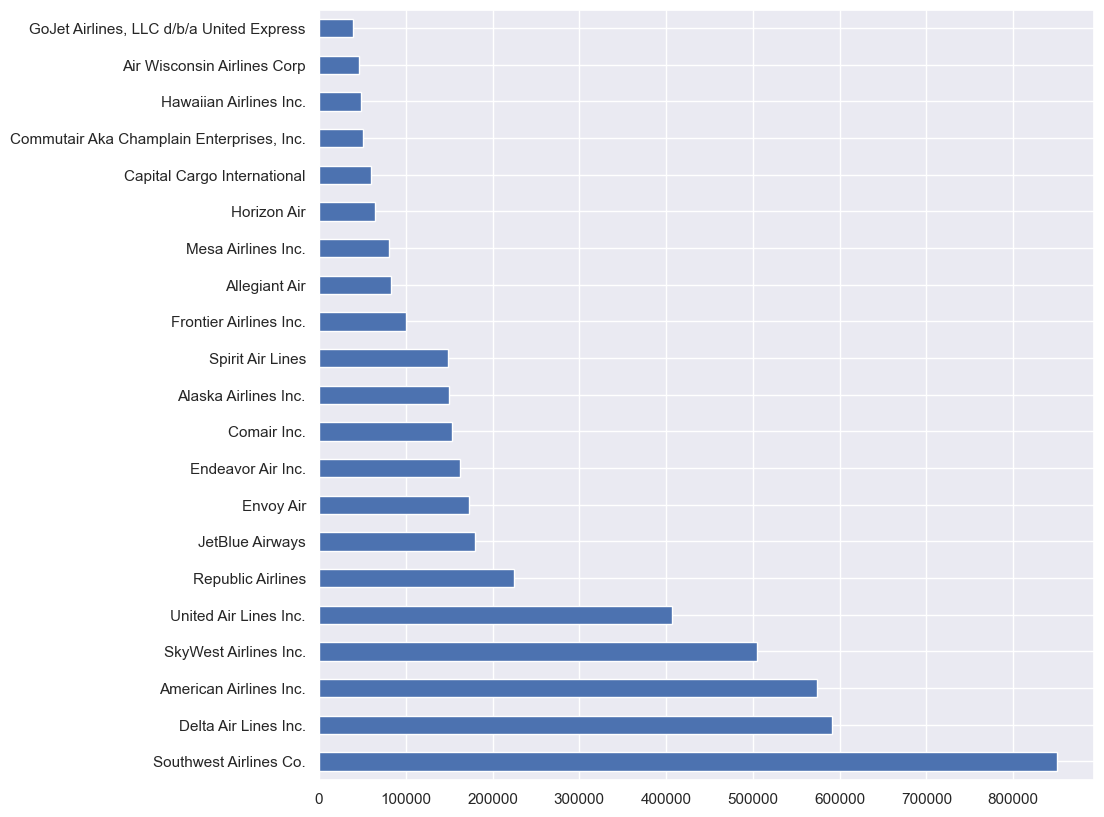

In [11]:
airline_counts = df_flights["Operating_Airline"].value_counts()
airline_counts.plot(kind='barh', figsize=(10, 10))


<AxesSubplot: >

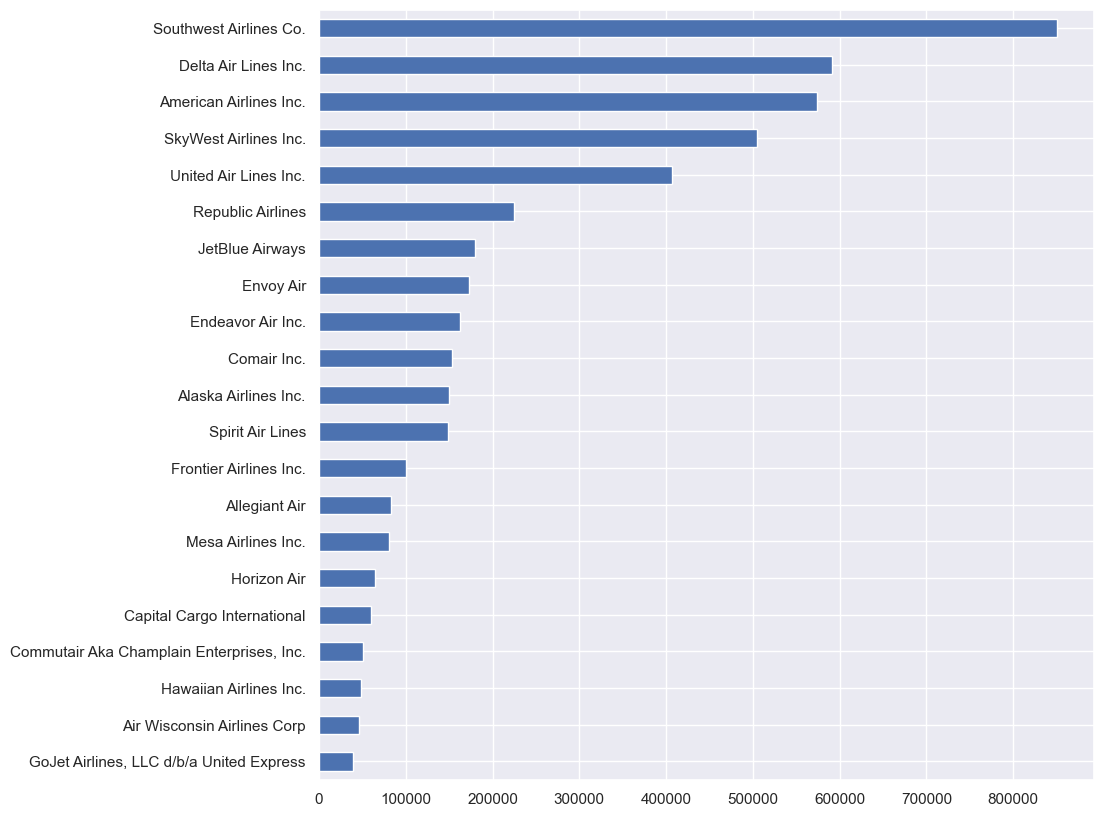

In [12]:
airline_counts.sort_values(ascending=True).plot(kind='barh', figsize=(10,10))

In [13]:
airline_counts.sort_values(ascending=True).to_frame("Row Count")

,Row Count
"GoJet Airlines, LLC d/b/a United Express",39310
Air Wisconsin Airlines Corp,45652
Hawaiian Airlines Inc.,48726
"Commutair Aka Champlain Enterprises, Inc.",51198
Capital Cargo International,59966
Horizon Air,64566
Mesa Airlines Inc.,80859
Allegiant Air,82786
Frontier Airlines Inc.,99894
Spirit Air Lines,148789


In [14]:
px.bar(
    airline_counts.sort_values(ascending=True), 
    orientation='h', 
    template="plotly_dark",
    title="Flights per airline",
    height=700,
    )

### Cancelled flights, group by Year

In [15]:
pct_cancelled = df_flights["Cancelled"].mean()
print(f"{pct_cancelled:0.2f}% of flights are cancelled")
pct_cancelled

0.03% of flights are cancelled


0.029555834471981582

In [16]:
df_flights["Cancelled"].value_counts()

False    4553292
True      138675
Name: Cancelled, dtype: int64

In [17]:
#df_flights.query("Year==2022").query("Cancelled")
df_flights.groupby("FlightDate")["Cancelled"].agg("mean").to_frame()

,Cancelled
FlightDate,
2022-01-01,0.153500
2022-01-02,0.129504
2022-01-03,0.158931
2022-01-04,0.080606
2022-01-05,0.094092
2022-01-06,0.110386
2022-01-07,0.126592
2022-01-08,0.072110
2022-01-09,0.062467


In [18]:
# flights in 2022
df_flights.query("'2022-01-01' <FlightDate < '2022-06-30'")

,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,Delta Air Lines Inc.,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,False,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,none,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,none,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,none,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,none,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-01-06,Delta Air Lines Inc.,12448,JAN,"Jackson/Vicksburg, MS",MS,10397,ATL,"Atlanta, GA",GA,Georgia,1237,1230.0,-7.0,0.0,0.0,-1.0,1200-1259,11.0,1241.0,1430.0,5.0,1458,1435.0,-23.0,0.0,0.0,-2.0,1400-1459,False,none,False,81.0,65.0,49.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-01-06,Delta Air Lines Inc.,14524,RIC,"Richmond, VA",VA,10397,ATL,"Atlanta, GA",GA,Georgia,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,13.0,910.0,1030.0,8.0,1050,1038.0,-12.0,0.0,0.0,-1.0,1000-1059,False,none,False,110.0,101.0,80.0,1.0,481.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-01-06,Delta Air Lines Inc.,13487,MSP,"Minneapolis, MN",MN,14635,RSW,"Fort Myers, FL",FL,Florida,1000,1018.0,18.0,18.0,1.0,1.0,1000-1059,15.0,1033.0,1431.0,4.0,1433,1435.0,2.0,2.0,0.0,0.0,1400-1459,False,none,False,213.0,197.0,178.0,1.0,1416.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-01-06,Delta Air Lines Inc.,10397,ATL,"Atlanta, GA",GA,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1414,1422.0,8.0,8.0,0.0,0.0,1400-1459,11.0,1433.0,1528.0,3.0,1533,1531.0,-2.0,0.0,0.0,-1.0,1500-1559,False,none,False,79.0,69.0,55.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-01-06,Delta Air Lines Inc.,14492,RDU,"Raleigh/Durham, NC",NC,10397,ATL,"Atlanta, GA",GA,Georgia,1643,1640.0,-3.0,0.0,0.0,-1.0,1600-1659,12.0,1652.0,1759.0,4.0,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,False,none,False,91.0,83.0,67.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
cancelled_flights_analysis = (
    (df_flights.query("'2022-01-01' < FlightDate < '2022-12-31'")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + \
    cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (
    cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100


In [20]:
cancelled_flights_analysis.head()     ## TODO: add geographical information of flight, weather information

,Operating_Airline,Departed,Cancelled,Total,Pct_Cancelled
0,Air Wisconsin Airlines Corp,43885,1556,45441,3.424220
1,Alaska Airlines Inc.,145717,3801,149518,2.542169
2,Allegiant Air,79634,2930,82564,3.548762
3,American Airlines Inc.,550460,21874,572334,3.821894
4,Capital Cargo International,58192,1553,59745,2.599381


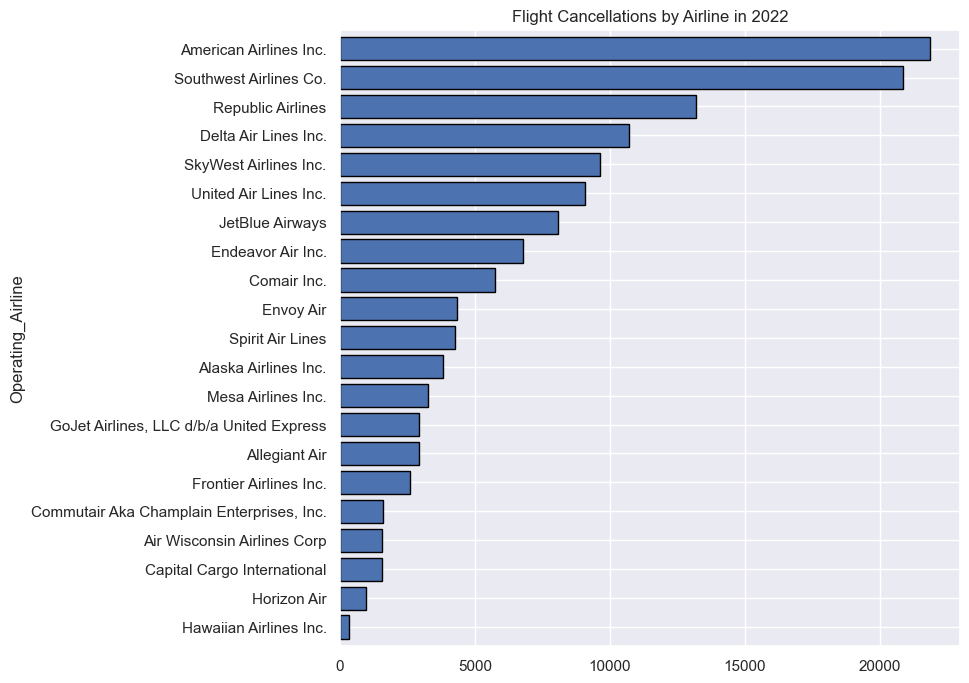

In [21]:
(cancelled_flights_analysis
 .set_index("Operating_Airline")
 .sort_values("Cancelled")["Cancelled"]
 .plot(kind="barh",
       figsize=(8, 8),
       width=.8,
       edgecolor="black",
       title="Flight Cancellations by Airline in 2022"))
plt.show()


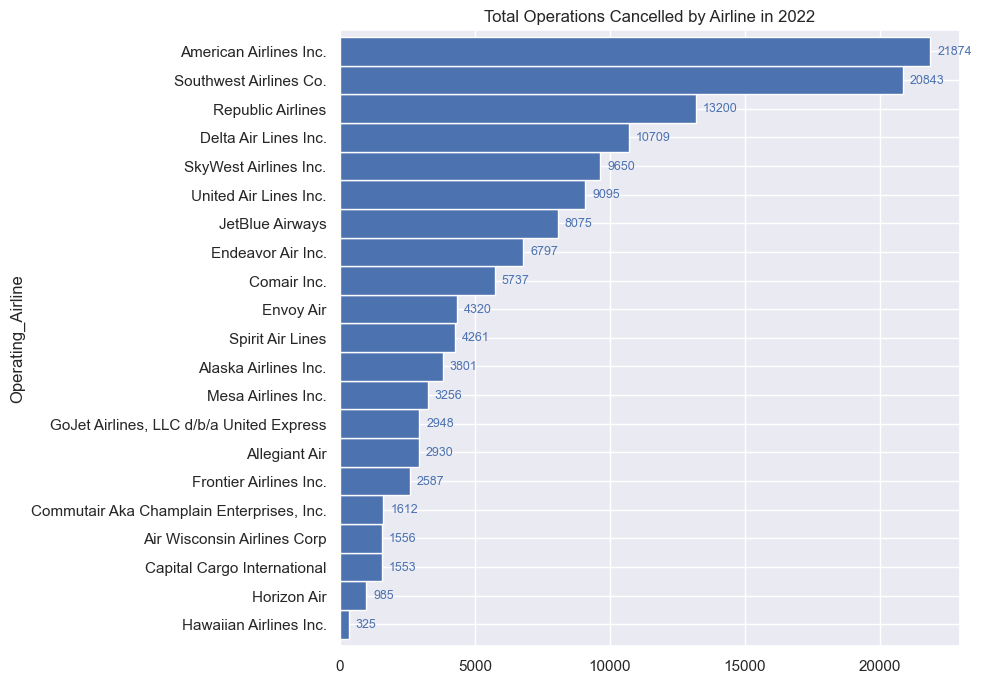

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
(cancelled_flights_analysis.set_index("Operating_Airline")
 .sort_values("Cancelled")["Cancelled"]
 .plot(kind="barh",
       title="Total Operations Cancelled by Airline in 2022",
       width=1
       ))

ax.bar_label(ax.containers[0], padding=5, fontsize=9, color='b')
plt.show()


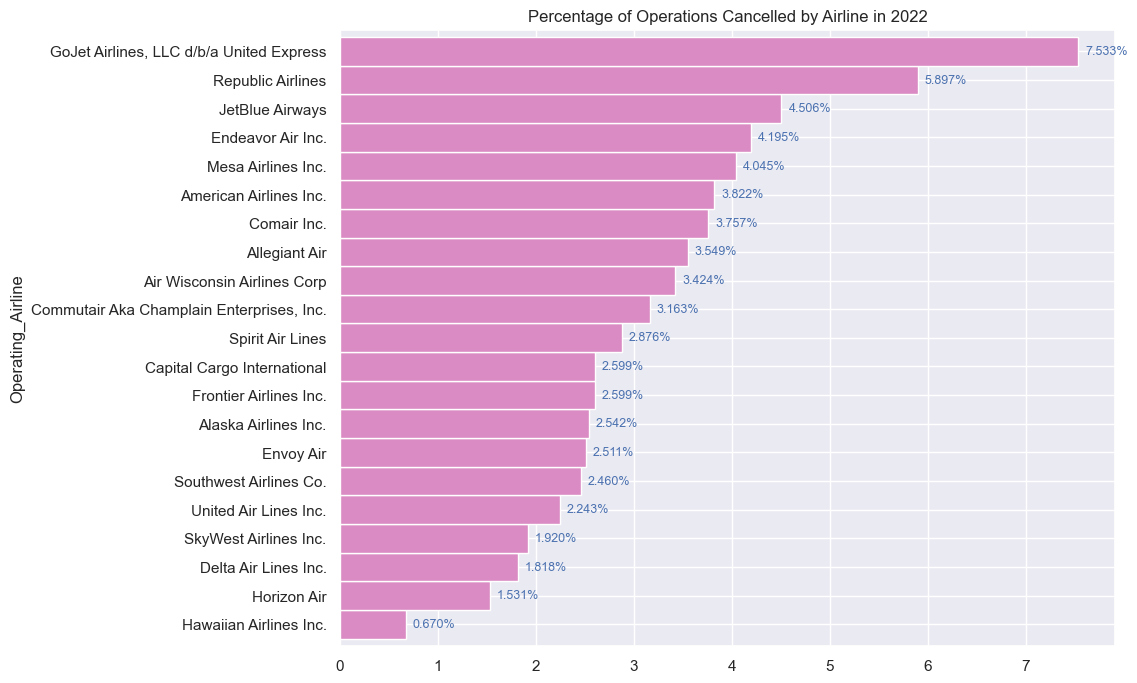

In [23]:
fig, ax = plt.subplots(figsize=(10, 8))
(cancelled_flights_analysis
 .set_index("Operating_Airline")
 .sort_values("Pct_Cancelled")["Pct_Cancelled"]
 .plot(kind="barh",
       title="Percentage of Operations Cancelled by Airline in 2022",
       width=1,
       # edgecolor="black",
       color=current_palette[6]
       ))
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()


In [24]:
df_flights[["FlightDate"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691967 entries, 0 to 4691966
Data columns (total 1 columns):
 #   Column      Dtype         
---  ------      -----         
 0   FlightDate  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 35.8 MB


In [25]:
cancelled_flights = df_flights.query("'2022-01-01' < FlightDate < '2022-12-31'")
cancelled_flights

,FlightDate,Operating_Airline,OriginAirportID,Origin,OriginCityName,OriginState,DestAirportID,Dest,DestCityName,DestState,DestStateName,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime
0,2022-01-06,Delta Air Lines Inc.,11697,FLL,"Fort Lauderdale, FL",FL,12953,LGA,"New York, NY",NY,New York,1126,0.0,0.0,0.0,0.0,0.0,1100-1159,0.0,0.0,0.0,0.0,1419,0.0,0.0,0.0,0.0,0.0,1400-1459,True,A,False,173.0,0.0,0.0,1.0,1076.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-06,Delta Air Lines Inc.,10397,ATL,"Atlanta, GA",GA,11697,FLL,"Fort Lauderdale, FL",FL,Florida,1631,1627.0,-4.0,0.0,0.0,-1.0,1600-1659,15.0,1642.0,1815.0,5.0,1821,1820.0,-1.0,0.0,0.0,-1.0,1800-1859,False,none,False,110.0,113.0,93.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-06,Delta Air Lines Inc.,11697,FLL,"Fort Lauderdale, FL",FL,10397,ATL,"Atlanta, GA",GA,Georgia,1931,1929.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1942.0,2104.0,10.0,2127,2116.0,-12.0,0.0,0.0,-1.0,2100-2159,False,none,False,116.0,106.0,83.0,1.0,581.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-06,Delta Air Lines Inc.,11697,FLL,"Fort Lauderdale, FL",FL,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1024,1019.0,-5.0,0.0,0.0,-1.0,1000-1059,17.0,1036.0,1209.0,3.0,1227,1212.0,-15.0,0.0,0.0,-1.0,1200-1259,False,none,False,123.0,113.0,93.0,1.0,680.0,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-06,Delta Air Lines Inc.,10397,ATL,"Atlanta, GA",GA,12448,JAN,"Jackson/Vicksburg, MS",MS,Mississippi,1117,1113.0,-4.0,0.0,0.0,-1.0,1100-1159,14.0,1127.0,1127.0,4.0,1142,1131.0,-11.0,0.0,0.0,-1.0,1100-1159,False,none,False,85.0,78.0,60.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-01-06,Delta Air Lines Inc.,12448,JAN,"Jackson/Vicksburg, MS",MS,10397,ATL,"Atlanta, GA",GA,Georgia,1237,1230.0,-7.0,0.0,0.0,-1.0,1200-1259,11.0,1241.0,1430.0,5.0,1458,1435.0,-23.0,0.0,0.0,-2.0,1400-1459,False,none,False,81.0,65.0,49.0,1.0,341.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2022-01-06,Delta Air Lines Inc.,14524,RIC,"Richmond, VA",VA,10397,ATL,"Atlanta, GA",GA,Georgia,900,857.0,-3.0,0.0,0.0,-1.0,0900-0959,13.0,910.0,1030.0,8.0,1050,1038.0,-12.0,0.0,0.0,-1.0,1000-1059,False,none,False,110.0,101.0,80.0,1.0,481.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-01-06,Delta Air Lines Inc.,13487,MSP,"Minneapolis, MN",MN,14635,RSW,"Fort Myers, FL",FL,Florida,1000,1018.0,18.0,18.0,1.0,1.0,1000-1059,15.0,1033.0,1431.0,4.0,1433,1435.0,2.0,2.0,0.0,0.0,1400-1459,False,none,False,213.0,197.0,178.0,1.0,1416.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2022-01-06,Delta Air Lines Inc.,10397,ATL,"Atlanta, GA",GA,14492,RDU,"Raleigh/Durham, NC",NC,North Carolina,1414,1422.0,8.0,8.0,0.0,0.0,1400-1459,11.0,1433.0,1528.0,3.0,1533,1531.0,-2.0,0.0,0.0,-1.0,1500-1559,False,none,False,79.0,69.0,55.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-01-06,Delta Air Lines Inc.,14492,RDU,"Raleigh/Durham, NC",NC,10397,ATL,"Atlanta, GA",GA,Georgia,1643,1640.0,-3.0,0.0,0.0,-1.0,1600-1659,12.0,1652.0,1759.0,4.0,1814,1803.0,-11.0,0.0,0.0,-1.0,1800-1859,False,none,False,91.0,83.0,67.0,1.0,356.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
cancelled_flights_count = (df_flights.query("'2022-01-01' < FlightDate < '2022-12-31'").query("Cancelled")["Operating_Airline"].value_counts())
cancelled_flights_count

American Airlines Inc.                       21874
Southwest Airlines Co.                       20843
Republic Airlines                            13200
Delta Air Lines Inc.                         10709
SkyWest Airlines Inc.                         9650
United Air Lines Inc.                         9095
JetBlue Airways                               8075
Endeavor Air Inc.                             6797
Comair Inc.                                   5737
Envoy Air                                     4320
Spirit Air Lines                              4261
Alaska Airlines Inc.                          3801
Mesa Airlines Inc.                            3256
GoJet Airlines, LLC d/b/a United Express      2948
Allegiant Air                                 2930
Frontier Airlines Inc.                        2587
Commutair Aka Champlain Enterprises, Inc.     1612
Air Wisconsin Airlines Corp                   1556
Capital Cargo International                   1553
Horizon Air                    

Analysis for January - June 2022

In [27]:
df_flights["FlightDate"].dt.month.value_counts()

7    618790
8    613649
5    602950
6    602057
3    590542
4    580290
1    563737
2    519952
Name: FlightDate, dtype: int64

In [28]:
df_flights["FlightDate"].dt.quarter.value_counts()

2    1785297
1    1674231
3    1232439
Name: FlightDate, dtype: int64

In [29]:
df_flights["FlightDate"].value_counts()

2022-07-21    20844
2022-07-15    20843
2022-07-28    20841
2022-06-17    20841
2022-07-14    20840
2022-07-29    20833
2022-06-23    20832
2022-07-22    20820
2022-07-11    20808
2022-07-18    20803
              ...  
2022-02-26    16798
2022-03-05    16747
2022-01-01    16684
2022-02-19    16541
2022-01-08    16031
2022-02-12    15975
2022-02-05    15946
2022-01-29    15644
2022-01-22    15625
2022-01-15    15483
Name: FlightDate, Length: 243, dtype: int64

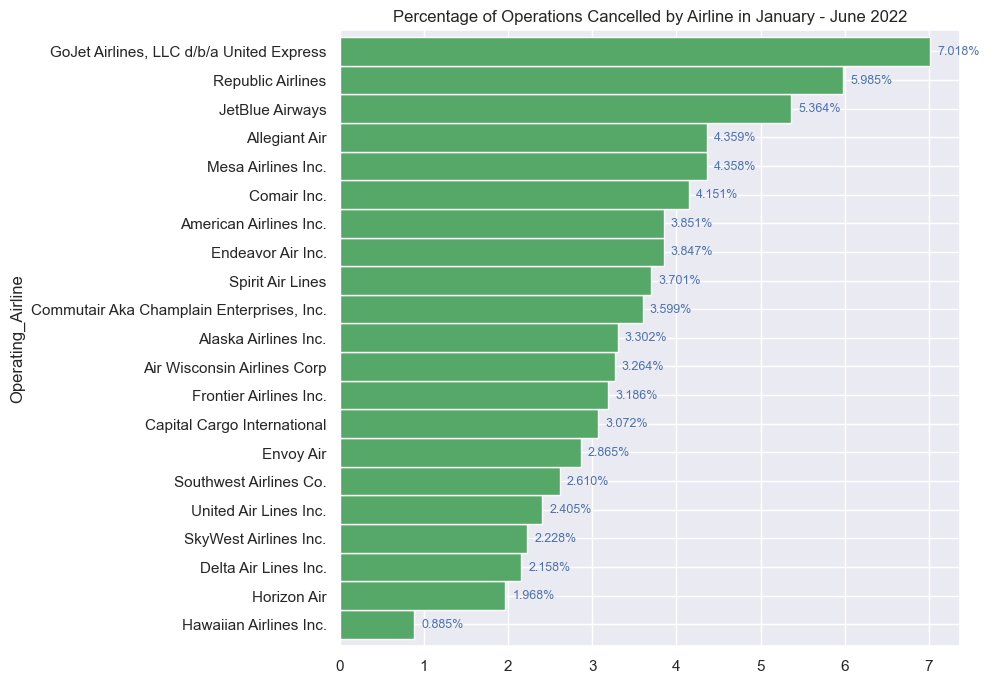

In [31]:
cancelled_flights_analysis = (
    (df_flights.query("'2022-01-01' < FlightDate < '2022-06-30'")
     .groupby(["Operating_Airline", "Cancelled"])['Cancelled']
     .size()
     .unstack()
     .reset_index()
     )
    .rename(columns={False: "Departed", True: "Cancelled"})
    .rename_axis(None, axis=1))

cancelled_flights_analysis["Total"] = cancelled_flights_analysis["Departed"] + cancelled_flights_analysis["Cancelled"]
cancelled_flights_analysis["Pct_Cancelled"] = (cancelled_flights_analysis["Cancelled"] / cancelled_flights_analysis["Total"])*100

fig, ax = plt.subplots(figsize=(8, 8))
cancelled_flights_analysis.set_index("Operating_Airline").sort_values(
    "Pct_Cancelled")["Pct_Cancelled"].plot(kind="barh",
                                           title="Percentage of Operations Cancelled by Airline in January - June 2022",
                                           width=1,
                                           #edgecolor="black",
                                           color=current_palette[2]
                                           )
ax.bar_label(ax.containers[0], fmt='%.3f%%', padding=5, fontsize=9, color='b')
plt.show()